<div class="alert alert-danger">
    This session will be recorded.
</div>

# "Isochrones" with OSM


How far can you travel on foot in 15 minutes?

<img src="images/isos.png" width=800>



## What is open street map?

![osm](images/OSM.png)

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the OpenStreetMap Wiki.

OSM has a large userbase with more than 7 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 6.5 billion nodes and counting! (stats from January 2021).

OpenStreetMap is used not only for integrating the OSM maps as background maps to visualizations or online maps, but also for many other purposes such as routing, geocoding, education, and research. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development. Read more about humanitarian projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org/).


- https://www.openstreetmap.org/
- [OSM stats](https://wiki.openstreetmap.org/wiki/Stats)

## OSMnx

<a href="https://www.spur.org/publications/urbanist-article/2012-11-09/grand-reductions-10-diagrams-changed-city-planning" target="_blank"><img src="https://www.spur.org/sites/default/files/migrated/images/F22.jpg" width=400></a>

[[Image source]](https://www.spur.org/publications/urbanist-article/2012-11-09/grand-reductions-10-diagrams-changed-city-planning)

Allan Jacobs’ seminal treatise Great Streets (1993) takes figure-ground analysis to a new level, showing 50 one-mile-square maps of cities around the world, all drawn to the same scale.


This week we will explore a Python module called OSMnx that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called NetworkX.

<img src="https://i2.wp.com/geoffboeing.com/wp-content/uploads/2017/04/square-mile-street-networks.jpg?resize=768%2C617&ssl=1" width=400>

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  

## What's an isochrone map?

<img src="https://www.tandfonline.com/na101/home/literatum/publisher/tandf/journals/content/cppr20/2017/cppr20.v032.i04/02697459.2017.1329487/20171208/images/large/cppr_a_1329487_f0001_oc.jpeg" width=800>

- [Isochrone Mapping of Urban Transport: Car-dependency, Mode-choice and Design Research](https://www.tandfonline.com/doi/figure/10.1080/02697459.2017.1329487?scroll=top&needAccess=true)


## Import the libraries

In [1]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

## Download and prep the street network

When fetching netowrk data from OpenStreetMap using `OSMnx`, it is possible to define the type of street network using the `network_type` parameter (options: `drive`, `walk` and `bike`). Below, we define the parameters that will determine the results of this lab.

- [graph_from_place](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_place)

In [2]:
# configure the place, network type, trip times, and travel speed
place = 'Boyle Heights, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [3]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# download the street network
G = ox.graph_from_place(place, network_type=network_type)

CPU times: user 3.84 s, sys: 91.6 ms, total: 3.94 s
Wall time: 14.1 s


In [4]:
# what is G?
type(G)

networkx.classes.multidigraph.MultiDiGraph

- [Networkx multidigraph](https://networkx.org/documentation/stable/reference/classes/multidigraph.html)

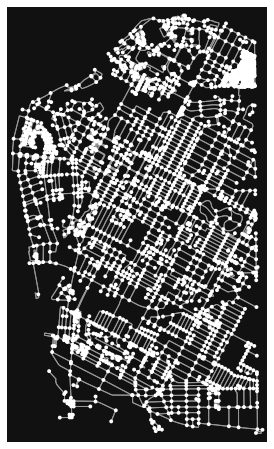

In [5]:
# quick plot using oxmnx
fig, ax = ox.plot_graph(G)

## Project to web mercator

![projections](https://www.esri.com/arcgis-blog/wp-content/uploads/2022/02/grid2.png)

In order to conduct spatial analysis, it is recommended to use a projected coordinate system, rather than a geographic coordinate system (which uses angular measurements). Here is an [blog post from ESRI](https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/gcs_vs_pcs/) that describes the differences between the two.

In [6]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(G, to_crs='epsg:3857')

## Convert edges and nodes to geodataframes

OSMnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let’s extract the nodes and edges from the graph as GeoDataFrames:

In [7]:
# convert nodes and edges to geodataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [8]:
gdf_nodes.head()

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
14941347,4.037235e+06,-1.315921e+07,traffic_signals,4,-118.211201,34.062781,POINT (-13159210.679 4037235.153)
6019058526,4.037191e+06,-1.315919e+07,NaN,3,-118.210974,34.062455,POINT (-13159185.454 4037191.279)
5765836463,4.037124e+06,-1.315935e+07,NaN,3,-118.212435,34.061957,POINT (-13159348.103 4037124.388)
1838295028,4.037279e+06,-1.315916e+07,NaN,3,-118.210722,34.063105,POINT (-13159157.346 4037278.623)
14941481,4.036784e+06,-1.315848e+07,stop,3,-118.204654,34.059425,POINT (-13158481.870 4036784.146)


<AxesSubplot:>

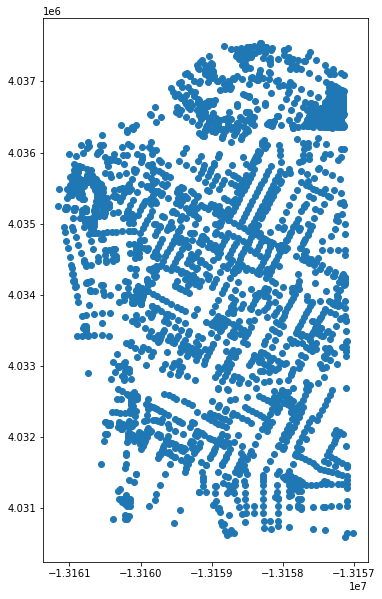

In [9]:
gdf_nodes.plot(figsize=(10,10))

In [10]:
gdf_edges.head()

osmid          name      highway  \
u          v          key                                                    
14941347   6019058526 0               604159989  Zonal Avenue  residential   
           5765836463 0    [9467485, 398606758]  Mission Road      primary   
           1838295028 0               398606760  Mission Road      primary   
6019058526 14941347   0               604159989  Zonal Avenue  residential   
           6437520973 0               604159989  Zonal Avenue  residential   

                           oneway   length  \
u          v          key                    
14941347   6019058526 0     False   41.878   
           5765836463 0     False  146.082   
           1838295028 0     False   56.936   
6019058526 14941347   0     False   41.878   
           6437520973 0     False   19.913   

                                                                    geometry  \
u          v          key                                                      
14941347   6019058526 0    LINESTRING (-13159210.679 4037235.153, -131591...   
           5765836463 0    LINESTRING (-13159210.679 4037235.153, -131592...   
           1838295028 0    LINESTRING (-13159210.679 4037235.153, -131591...   
6019058526 14941347   0    LINESTRING (-13159185.454 4037191.279, -131592...   
           6437520973 0    LINESTRING (-13159185.454 4037191.279, -131591...   

                            lanes maxspeed service bridge access tunnel  
u          v          key                                                
14941347   6019058526 0       NaN      NaN     NaN    NaN    NaN    NaN  
           5765836463 0    [4, 5]   45 mph     NaN    NaN    NaN    NaN  
           1838295028 0         7   45 mph     NaN    NaN    NaN    NaN  
6019058526 14941347   0       NaN      NaN     NaN    NaN    NaN    NaN  
           6437520973 0       NaN      NaN     NaN    NaN    NaN    NaN

<AxesSubplot:>

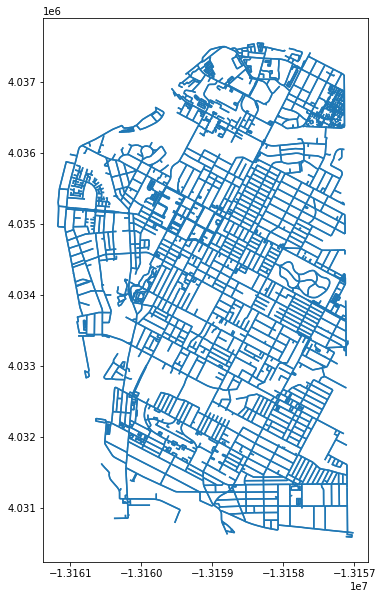

In [11]:
gdf_edges.plot(figsize=(10,10))

There are many columns in our GeoDataFrame. Most of the columns are fairly self-explanatory but the following table describes all of them.

Most of the attributes come directly from the OpenStreetMap, however, columns `u` and `v` are Networkx specific ids. You can click on the links to get more information about each attribute:


| Column                                                     | Description                 | Data type         |
|------------------------------------------------------------|-----------------------------|-------------------|
| [bridge](http://wiki.openstreetmap.org/wiki/Key:bridge)    | Bridge feature              | boolean           |
| geometry                                                   | Geometry of the feature     | Shapely.geometry  |
| [highway](http://wiki.openstreetmap.org/wiki/Key:highway)  | Tag for roads (road type)   | str / list        |
| [lanes](http://wiki.openstreetmap.org/wiki/Key:lanes)      | Number of lanes             | int (or nan)      |
| [length](http://wiki.openstreetmap.org/wiki/Key:length)    | Length of feature (meters)  | float             |
| [maxspeed](http://wiki.openstreetmap.org/wiki/Key:maxspeed)| maximum legal speed limit   | int /list         |
| [name](http://wiki.openstreetmap.org/wiki/Key:name)        | Name of the (street) element| str (or nan)      |
| [oneway](http://wiki.openstreetmap.org/wiki/Key:oneway)    | One way road                | boolean           |
| [osmid](http://wiki.openstreetmap.org/wiki/Node)           | Unique ids for the element  | list              |
| [u](http://ow.ly/bV8n30h7Ufm)                              | The first node of edge      | int               |
| [v](http://ow.ly/bV8n30h7Ufm)                              | The last node of edge       | int               |


Let's take a look what kind of features we have in the `highway` column:

In [12]:
gdf_edges['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential                2866
service                    2272
footway                    2112
secondary                   680
primary                     458
tertiary                    422
unclassified                 26
pedestrian                   22
steps                        14
[steps, footway]             14
primary_link                 12
[residential, service]       12
[residential, footway]       10
[footway, steps]              8
path                          6
[residential, primary]        4
[path, footway]               4
tertiary_link                 4
[residential, tertiary]       2
[residential, track]          2
[residential, steps]          2
secondary_link                2
[service, footway]            2
Name: highway, dtype: int64

## Analyzing the network properties

Now as we have seen some of the basic functionalities of OSMnx such as downloading the data and converting data from graph to GeoDataFrame, we can take a look some of the analytical features of omsnx. Osmnx includes many useful functionalities to extract information about the network.

To calculate some of the basic street network measures we can use [basic_stats()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.stats.basic_stats) function in OSMnx:

In [13]:
# Calculate network statistics
stats = ox.basic_stats(G, circuity_dist='euclidean')
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 3385,
 'm': 8956,
 'k_avg': 5.291580502215657,
 'edge_length_total': 565921.9759999994,
 'edge_length_avg': 63.189144260830666,
 'streets_per_node_avg': 2.6706056129985227,
 'streets_per_node_counts': {0: 0,
  1: 828,
  2: 0,
  3: 2030,
  4: 519,
  5: 4,
  6: 3,
  7: 0,
  8: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2446085672082718,
  2: 0.0,
  3: 0.5997045790251108,
  4: 0.1533234859675037,
  5: 0.0011816838995568684,
  6: 0.0008862629246676514,
  7: 0.0,
  8: 0.0002954209748892171},
 'intersection_count': 2557,
 'street_length_total': 282960.98800000007,
 'street_segment_count': 4478,
 'street_length_avg': 63.189144260830744,
 'circuity_avg': 0.8778354147054365,
 'self_loop_proportion': 0.003796337650736936}

## Get the centroid

For this lab, we will use the centroid of the street network as the point from which to conduct our travel isochrone maps. Note that this needs to be somewhere within the street network to build the isochrone, and does not necessarily have to be the centroid.

- [geopandas `total_bounds`](https://geopandas.org/reference.html#geopandas.GeoSeries.bounds)

In [14]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13161164.62561151
4030593.4297504905
-13157011.662764335
4037541.6258511576


In [15]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13159088.144187924
4034067.527800824


## Get the nearest node to the centroid

Let's now find the nearest graph node (and its node ID) to the centroid point using OSMnx [get_nearest_node](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.get_nearest_node). 

According to the documentation of this function, we need to parse Point coordinates as coordinate-tuples in this order: `latitude, longitude`(or `y, x`). As our data is now projected to UTM projection, we need to specify with `method` parameter that the function uses `'euclidean'` distances to calculate the distance from the point to the closest node (with decimal derees, use `'haversine'`, which determines the great-circle distances). The method parameter is important if you want to know the actual distance between the Point and the closest node which you can retrieve by specifying parameter `return_dist=True`.

In [16]:
# use osmnx's get_nearest_node command to get the id for the nearest node
center_node = ox.get_nearest_node(G, 
                                  (centroid_y,centroid_x), 
                                  method = 'euclidean')
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 122620409


/opt/conda/lib/python3.9/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [17]:
# what is this record?
gdf_nodes.loc[[center_node]]

,y,x,highway,street_count,lon,lat,geometry
osmid,,,,,,,
122620409,4.034109e+06,-1.315900e+07,NaN,3,-118.209326,34.039516,POINT (-13159002.000 4034109.268)


Why `loc` and not `iloc`? The differences are confusing...

-  loc gets rows (or columns) with particular labels from the index
-  iloc gets rows (or columns) at particular positions in the index (so it only takes integers)

In this case, although the index is numeric, it does not represent a cumulative position in the dataframe, but rather is a reference to the OSM ID for that node. Therefore, we must use `loc` instead of `iloc`.

## Map the network layers

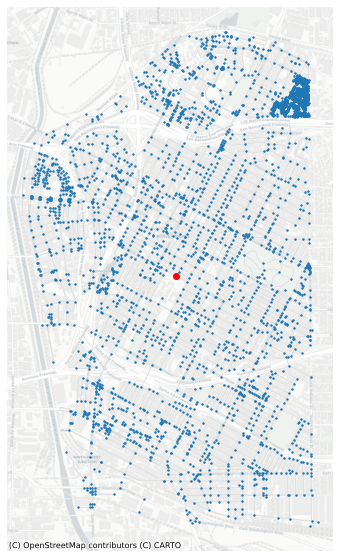

In [18]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# Create isochrones

How far can you walk in 5, 10, 15, and 20 minutes from the central node? 

## Calculating travel cost

Now comes the fun part. We have thus far:

- downloaded nodes and edges for our place of interest
- reprojected them to web mercator for spatial analysis
- converted the data to geodataframes
- determined the centroid of the network
- determined the node closest to the centroid to conduct create isochrone maps

In order to create isochrone maps, we need to associate a **cost** to each edge in our network. In other words, we need an attribute that tells us exactly how long it would take an average person to traverse the distance of each edge in our network.

In [19]:
# a quick look at the data
gdf_edges[['osmid','name','highway','length']].sample(5)

,,,osmid,name,highway,length
u,v,key,,,,
5511141605,5511141593,0,574012083,NaN,footway,6.196
6787973939,6787973941,0,723753718,NaN,service,5.722
317643468,317643458,0,"[28897560, 838632799]",NaN,primary_link,66.417
2278396086,2278396089,0,218604145,NaN,footway,5.695
6790394189,6790345577,0,724031402,NaN,service,68.817


In [20]:
# create a new column, calculate the time it takes to travel that edge
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

Now let's do a spot check. If a person travels 75 meters per minute, do the numbers in the new `walk_time` column make sense?

In [21]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

,,,osmid,name,highway,length,walk_time
u,v,key,,,,,
7849933179,7849933178,0,841330499,NaN,service,46.762,0.623493
2280385955,2280385956,0,218831315,NaN,footway,4.443,0.059240
7883439929,7883439935,0,844992766,NaN,service,138.739,1.849853
6726274985,6726274986,0,715719021,NaN,residential,42.592,0.567893
604238296,604238290,0,604159988,State Street,secondary,47.989,0.639853
4003293300,7883065477,0,844955026,NaN,service,77.088,1.027840
2268956172,2268956173,0,217602994,NaN,footway,1.765,0.023533
123704685,6728861368,0,13454793,Boulder Street,residential,70.992,0.946560
6927701703,2530330859,0,398786236,Soto Street,primary,2.634,0.035120


## Choosing colors (cmap) for our isochrones

- https://matplotlib.org/examples/color/colormaps_reference.html

OSMnx has included a super handy utility [`get_colors`](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=get_colors#osmnx.plot.get_colors) to extract colors from existing cmap color bands. The way it works is that you ask for any number of colors (since we have 4 travel times, we want 4 colors), give it a cmap name, and it returns you a list of colors. 

In [22]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [23]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [24]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [25]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


## Color each node based on travel time from point of interest

Now that we have determined the color for each travel time, let's loop through each time/color, and assign the nodes that fall within that travel time. To do so, we use a feature from [NetworkX called `ego_graph`.](https://networkx.org/documentation/stable//reference/generated/networkx.generators.ego.ego_graph.html) The ego graph determines which nodes fall within a given "radius", which in our case is determined by time.

The following loop does:

- loops through each time/color
- creates an ego graph for each time/color
- assigns the time/color in the geodataframe to each node that falls within

In [26]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, center_node, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 1136 nodes within 20 minutes 
There are 664 nodes within 15 minutes 
There are 280 nodes within 10 minutes 
There are 62 nodes within 5 minutes 


In [27]:
# spot check
gdf_nodes[['osmid','highway','time','color']].sample(20)

KeyError: "['osmid'] not in index"

In [28]:
# the NaN values then need to be populated with a valid color
gdf_nodes['color'].fillna('#cccccc', inplace=True)

In [29]:
# another spot check: are all values in the color column populated?
gdf_nodes.sample(10)

,y,x,highway,street_count,lon,lat,geometry,time,color
osmid,,,,,,,,,
122954769,4.034012e+06,-1.315857e+07,NaN,1,-118.205421,34.038794,POINT (-13158567.264 4034012.276),5 mins,#f0f921
2274030645,4.036696e+06,-1.315717e+07,NaN,1,-118.192904,34.058768,POINT (-13157173.855 4036695.892),NaN,#cccccc
1325904170,4.033192e+06,-1.315945e+07,NaN,3,-118.213343,34.032686,POINT (-13159449.181 4033191.829),10 mins,#ed7953
728876708,4.036647e+06,-1.315757e+07,NaN,4,-118.196424,34.058405,POINT (-13157565.744 4036647.062),NaN,#cccccc
269607282,4.035209e+06,-1.316106e+07,traffic_signals,4,-118.227776,34.047699,POINT (-13161055.777 4035208.663),NaN,#cccccc
122704529,4.034414e+06,-1.315756e+07,NaN,3,-118.196406,34.041785,POINT (-13157563.707 4034414.112),NaN,#cccccc
122819586,4.033774e+06,-1.315971e+07,NaN,3,-118.215675,34.037022,POINT (-13159708.778 4033774.274),10 mins,#ed7953
2547323050,4.036802e+06,-1.315925e+07,NaN,3,-118.211539,34.059558,POINT (-13159248.316 4036801.990),NaN,#cccccc
3536714154,4.031714e+06,-1.315902e+07,NaN,3,-118.209520,34.021687,POINT (-13159023.596 4031714.486),NaN,#cccccc


<AxesSubplot:>

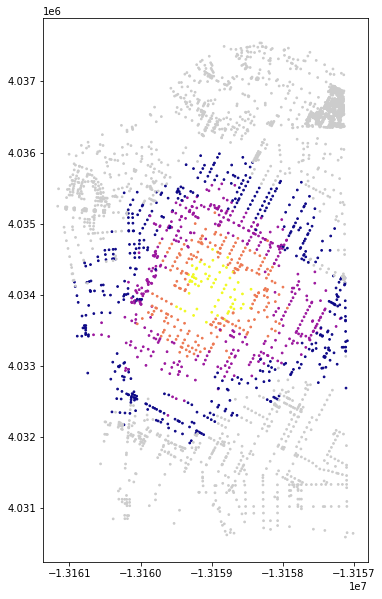

In [30]:
# map it
gdf_nodes.plot(figsize=(10,10),
               color=gdf_nodes['color'],
               markersize=3)

## Create polygons for each time area

In [31]:
# show only the points within 5 minutes
gdf_nodes[gdf_nodes['time']=='5 mins']

,y,x,highway,street_count,lon,lat,geometry,time,color
osmid,,,,,,,,,
15068251,4.034255e+06,-1.315927e+07,traffic_signals,4,-118.211756,34.040602,POINT (-13159272.528 4034255.240),5 mins,#f0f921
4003293300,4.034283e+06,-1.315932e+07,NaN,3,-118.212227,34.040811,POINT (-13159324.971 4034283.250),5 mins,#f0f921
7859958197,4.034201e+06,-1.315930e+07,NaN,3,-118.212015,34.040197,POINT (-13159301.271 4034200.846),5 mins,#f0f921
7883065477,4.034285e+06,-1.315926e+07,NaN,3,-118.211621,34.040827,POINT (-13159257.422 4034285.426),5 mins,#f0f921
7859958204,4.034241e+06,-1.315924e+07,NaN,3,-118.211509,34.040495,POINT (-13159244.988 4034240.879),5 mins,#f0f921
...,...,...,...,...,...,...,...,...,...
5880367542,4.034185e+06,-1.315931e+07,NaN,3,-118.212088,34.040083,POINT (-13159309.420 4034185.438),5 mins,#f0f921
6735433781,4.034224e+06,-1.315905e+07,NaN,1,-118.209796,34.040373,POINT (-13159054.331 4034224.382),5 mins,#f0f921
7859958207,4.034187e+06,-1.315928e+07,NaN,3,-118.211795,34.040092,POINT (-13159276.859 4034186.633),5 mins,#f0f921


In [32]:
# put it in a variable
gdf_5 = gdf_nodes[gdf_nodes['time']=='5 mins']

<AxesSubplot:>

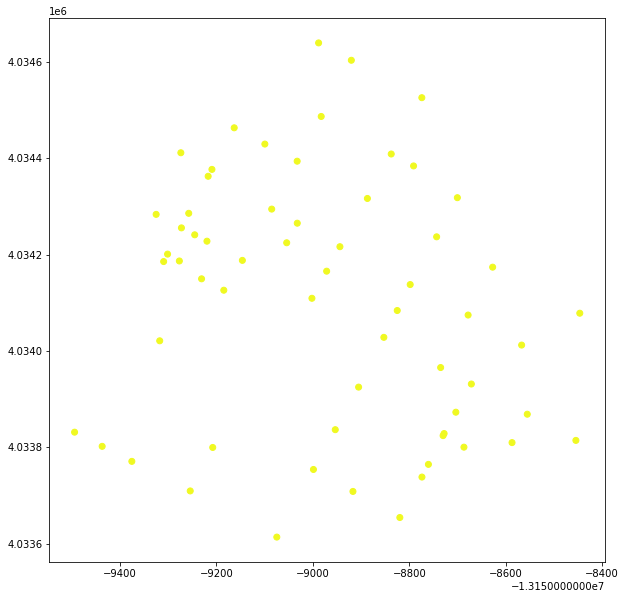

In [33]:
# plot it
gdf_5.plot(figsize=(10,10),color=gdf_5.color)

Points are great, but polygons are visually more informative. For this, we create a [convex hull](https://medium.com/@harshitsikchi/convex-hulls-explained-baab662c4e94).

![convex hull](https://miro.medium.com/max/1489/1*F4IUmOJbbLMJiTgHxpoc7Q.png)

[source](https://miro.medium.com/max/1489/1*F4IUmOJbbLMJiTgHxpoc7Q.png)

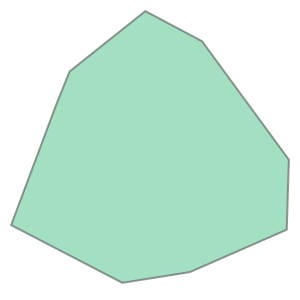

In [34]:
# combine all the points (unary_union) and create a convex hull polygon
gdf_5.unary_union.convex_hull

## Dissolve to the rescue!

Now that we understand the process of how the isochrones will be created (from points to convex hulls), let's apply this to each of our travel times. The `dissolve` function is a handy geopandas tool that collapses and groups our data based on a given category. We can use this to create grouped points per time period.

- https://geopandas.org/aggregation_with_dissolve.html

In [35]:
# dissolve the nodes by time
isochrones = gdf_nodes.dissolve("time")
isochrones

,geometry,y,x,highway,street_count,lon,lat,color
time,,,,,,,,
10 mins,"MULTIPOINT (-13160046.399 4033592.199, -131599...",4.033418e+06,-1.315971e+07,traffic_signals,4,-118.215689,34.034368,#ed7953
15 mins,"MULTIPOINT (-13160661.094 4033437.892, -131605...",4.033293e+06,-1.316014e+07,traffic_signals,4,-118.219588,34.033436,#9c179e
20 mins,"MULTIPOINT (-13160929.552 4034177.821, -131609...",4.034584e+06,-1.316015e+07,traffic_signals,4,-118.219629,34.043049,#0d0887
5 mins,"MULTIPOINT (-13159494.054 4033831.715, -131594...",4.034255e+06,-1.315927e+07,traffic_signals,4,-118.211756,34.040602,#f0f921


In [36]:
# for each row, create a convex hull
isochrones = isochrones.convex_hull.reset_index()
isochrones

,time,0
0,10 mins,"POLYGON ((-13158751.208 4033118.097, -13159344..."
1,15 mins,"POLYGON ((-13159615.270 4032304.807, -13160212..."
2,20 mins,"POLYGON ((-13159308.206 4031916.544, -13160232..."
3,5 mins,"POLYGON ((-13159074.825 4033614.202, -13159494..."


In [37]:
# geometry header has been automatically named "0"
# let's rename that
isochrones.columns=['time','geometry']

In [38]:
isochrones.head()

,time,geometry
0,10 mins,"POLYGON ((-13158751.208 4033118.097, -13159344..."
1,15 mins,"POLYGON ((-13159615.270 4032304.807, -13160212..."
2,20 mins,"POLYGON ((-13159308.206 4031916.544, -13160232..."
3,5 mins,"POLYGON ((-13159074.825 4033614.202, -13159494..."


<AxesSubplot:>

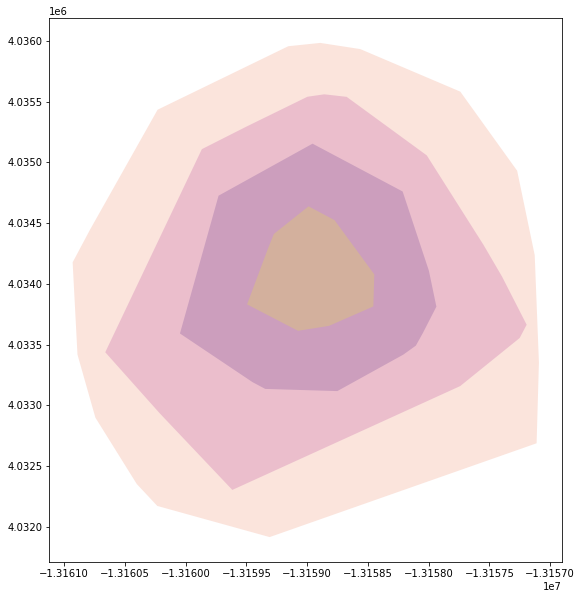

In [39]:
isochrones.plot(figsize=(10,10),alpha=0.2,cmap='plasma')

# Putting it all together

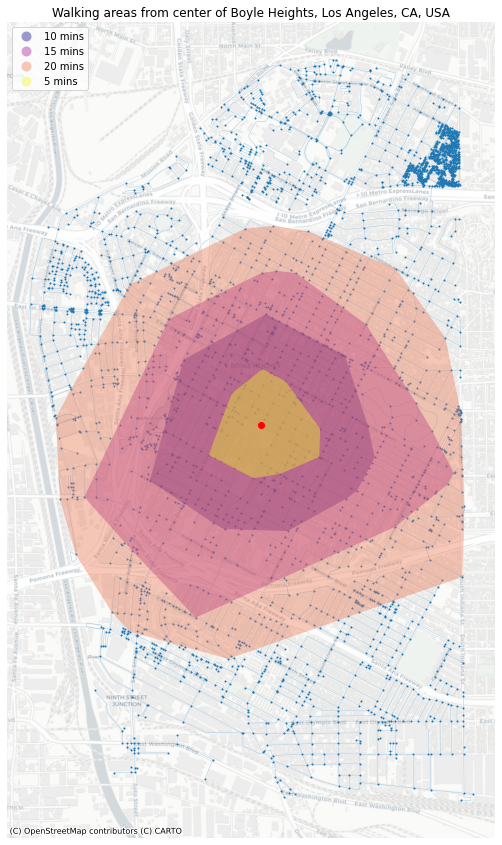

In [40]:
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from center of ' + place)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# Creating "better" isochrones

![better isos](images/betterisos.png)

The material in this section has been inspired by the following sources:

- [Better Rendering of Isochrones from Network Graphs](http://kuanbutts.com/2017/12/16/osmnx-isochrones/) by Kuan Butts (Mapbox software engineer)
- [Draw an isochrone map with OSMnx](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/13-isolines-isochrones.ipynb) by Geoff Boeing

In [41]:
# additional libraries for geometry shapes
from shapely.geometry import Point, LineString, Polygon
from descartes import PolygonPatch

In [42]:
# function to create "better" isochrones
def make_iso_polys(G, edge_buff=25, node_buff=50, infill=False):
    isochrone_polys = []
    for trip_time in sorted(trip_times, reverse=True):
        subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='time')

        node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
        nodes_gdf = gpd.GeoDataFrame({'id': list(subgraph.nodes)}, geometry=node_points)
        nodes_gdf = nodes_gdf.set_index('id')

        edge_lines = []
        for n_fr, n_to in subgraph.edges():
            f = nodes_gdf.loc[n_fr].geometry
            t = nodes_gdf.loc[n_to].geometry
            edge_lookup = G.get_edge_data(n_fr, n_to)[0].get('geometry',  LineString([f,t]))
            edge_lines.append(edge_lookup)

        n = nodes_gdf.buffer(node_buff).geometry
        e = gpd.GeoSeries(edge_lines).buffer(edge_buff).geometry
        all_gs = list(n) + list(e)
        new_iso = gpd.GeoSeries(all_gs).unary_union
        
        # try to fill in surrounded areas so shapes will appear solid and blocks without white space inside them
        if infill:
            new_iso = Polygon(new_iso.exterior)
        isochrone_polys.append(new_iso)
    return isochrone_polys

In [43]:
# call function to create "better" isochrones for G
isochrone_polys = make_iso_polys(G, edge_buff=25, node_buff=0, infill=True)

In [44]:
# Create an empty geopandas GeoDataFrame
better_isos = gpd.GeoDataFrame()
better_isos['geometry'] = None

In [45]:
# loop through the polygons and put them in a geodataframe
for i in range(len(isochrone_polys)):
    better_isos.loc[i,'geometry'] = isochrone_polys[i]
    better_isos.loc[i,'time'] =  str(trip_times[i]) + ' mins'
better_isos

,geometry,time
0,"POLYGON ((-13160225.180 4032149.112, -13160227...",20 mins
1,"POLYGON ((-13159607.361 4032281.091, -13159609...",15 mins
2,"POLYGON ((-13159012.271 4033189.930, -13159012...",10 mins
3,"POLYGON ((-13158904.824 4033730.689, -13158902...",5 mins


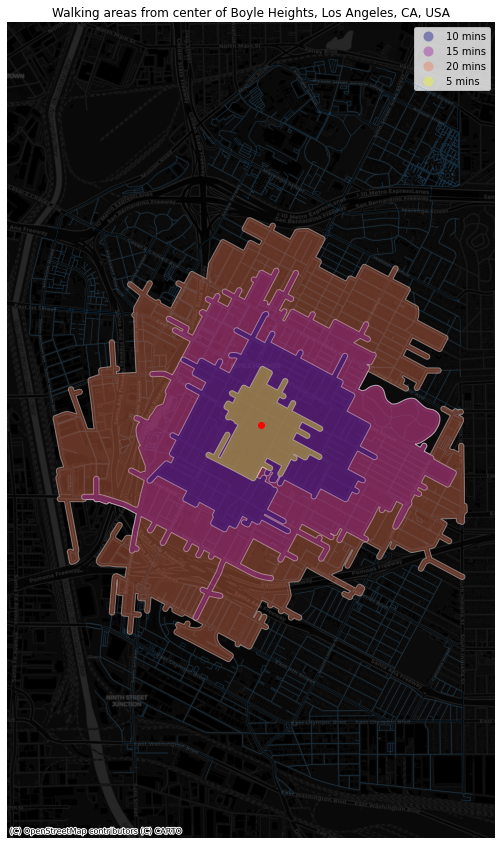

In [46]:
# create a beautiful map with all relevant layers
# set up the subplots
fig, ax = plt.subplots(figsize=(10,15))

# add the isochrones
better_isos.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                edgecolor='white',
                 legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
# gdf_nodes.plot(ax=ax, 
#                markersize=1, 
#                zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walking areas from center of ' + place)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

<div class="alert alert-info">
    
<h2>Now it's your turn!</h2>

Create isochrone maps based on a new location. Make sure not to choose a huge area (e.g. "Los Angeles" or "Tokyo" will most certainly be too large for this notebook to handle). Change parameters as you like (such as travel times), and run the notebook to produce an isochrone map.

When you are done, post your results in the [class gallery](https://docs.google.com/document/d/1NHCfN5wzu7oglzo1LUHVGWqzXSVmH5XDvXOuhmPD8Yw/edit).

</div>